In [1]:
%load_ext google.cloud.bigquery

In [2]:
import os
from google.cloud import bigquery
import db_dtypes

# os.environ['GOOGLE_APPLICATION_CREDENTIALS']
os.environ["GOOGLE_CLOUD_PROJECT"] = "learnings-406016"

client = bigquery.Client()

/Users/dantonik/Desktop/code-challenges-main/.venv/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 14 years ago. So if today is 2023.10.27 then the weather we want to forecast is for the date 2009.10.28. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

In [3]:
%%bigquery
SELECT
*
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


/Users/dantonik/Desktop/code-challenges-main/.venv/lib/python3.11/site-packages/google/cloud/bigquery/job/query.py:1859: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
/Users/dantonik/Desktop/code-challenges-main/.venv/lib/python3.11/site-packages/google/cloud/bigquery/table.py:2153: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,38560,99999,1929,11,6,52.000000,4,48.000000,4,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,39730,99999,1929,10,17,51.799999,4,45.799999,4,1014.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,33790,99999,1929,8,20,59.200001,4,50.500000,4,1021.400024,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,39800,99999,1929,10,8,47.500000,4,43.500000,4,1001.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,30050,99999,1929,12,9,41.500000,4,37.400002,4,973.799988,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,38110,99999,1929,12,23,48.000000,4,45.000000,4,986.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,33790,99999,1929,9,30,51.500000,4,47.000000,4,1012.900024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
7,39730,99999,1929,10,6,50.500000,4,41.900002,4,992.000000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,38640,99999,1929,10,26,43.000000,4,37.500000,4,1003.200012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
9,33960,99999,1929,12,24,40.000000,4,39.000000,4,992.700012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [6]:
query = """
    SELECT *
    FROM `bigquery-public-data.samples.gsod`
    WHERE station_number BETWEEN 725300 AND 726300
      AND year BETWEEN 2005 AND 2009
    ORDER BY station_number, year, month, day
"""


In [7]:
query_job = client.query(query)
results = query_job.result()

In [9]:
import pandas as pd
df = pd.DataFrame([dict(row) for row in results])

In [18]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [19]:
column_order = ['date'] + [col for col in df.columns if col != 'date']
df = df[column_order]

In [21]:
df.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [22]:
print(df.head())


        date  station_number  wban_number  mean_temp  num_mean_temp_samples  \
0 2005-01-01          725300        94846  32.099998                     24   
1 2005-01-02          725300        94846  42.799999                     24   
2 2005-01-03          725300        94846  34.599998                     24   
3 2005-01-04          725300        94846  32.299999                     24   
4 2005-01-05          725300        94846  29.700001                     24   

   mean_dew_point  num_mean_dew_point_samples  mean_sealevel_pressure  \
0       21.200001                        24.0             1027.800049   
1       40.099998                        24.0             1023.000000   
2       31.600000                        24.0             1026.000000   
3       29.400000                        24.0             1026.500000   
4       26.900000                        24.0             1023.799988   

   num_mean_sealevel_pressure_samples  mean_station_pressure  ...  \
0                

In [23]:
df.to_csv('weather_data_2005_2009.csv', index=False)

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [24]:
print(df.shape)
print(df.columns)

(377784, 29)
Index(['date', 'station_number', 'wban_number', 'mean_temp',
       'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_station_pressure', 'num_mean_station_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')


In [17]:
print(df.dtypes)

station_number                          int64
wban_number                             int64
year                                    int64
month                                   int64
day                                     int64
mean_temp                             float64
num_mean_temp_samples                   int64
mean_dew_point                        float64
num_mean_dew_point_samples            float64
mean_sealevel_pressure                float64
num_mean_sealevel_pressure_samples    float64
mean_station_pressure                 float64
num_mean_station_pressure_samples     float64
mean_visibility                       float64
num_mean_visibility_samples           float64
mean_wind_speed                       float64
num_mean_wind_speed_samples           float64
max_sustained_wind_speed              float64
max_gust_wind_speed                   float64
max_temperature                       float64
max_temperature_explicit               object
min_temperature                   

In [ ]:
print(df.isnull().sum())

In [ ]:
print(df.describe())

In [27]:
columns_to_drop = [col for col in df.columns if col.endswith('samples')]
df.drop(columns_to_drop, axis=1, inplace=True)

In [41]:
columns_to_drop = ['wban_number', 'mean_station_pressure', 'max_sustained_wind_speed', 'max_gust_wind_speed', 'max_temperature_explicit', 'min_temperature_explicit', 'fog', 'hail', 'thunder', 'tornado']
for col in columns_to_drop:
	try:
		df.drop(col, axis=1, inplace=True)
	except KeyError:
		print(f'{col} probably already dropped.')

wban_number probably already dropped.
mean_station_pressure probably already dropped.
max_sustained_wind_speed probably already dropped.
max_gust_wind_speed probably already dropped.
max_temperature_explicit probably already dropped.
min_temperature_explicit probably already dropped.
fog probably already dropped.
thunder probably already dropped.
tornado probably already dropped.


In [42]:
df.to_csv('weather_data_2005_2009.csv', index=False)

In [43]:
print(df.isnull().sum())

date                           0
station_number                 0
mean_temp                      0
mean_dew_point               158
mean_sealevel_pressure    145847
mean_visibility             9679
mean_wind_speed              360
max_temperature               98
min_temperature           377784
total_precipitation        45344
snow_depth                371089
rain                           0
snow                           0
dtype: int64


'snow_depth' and 'min_temperature' are almost completely missing. 

In [44]:
df.drop(['snow_depth', 'min_temperature'], axis=1, inplace=True)

In [45]:
missing_counts = df.isna().sum(axis=1)
df_sorted_by_missing = df.assign(missing_counts=missing_counts).sort_values(by='missing_counts', ascending=False)
df_sorted_by_missing.to_csv('weather_data_missing_values.csv', index=False)


Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

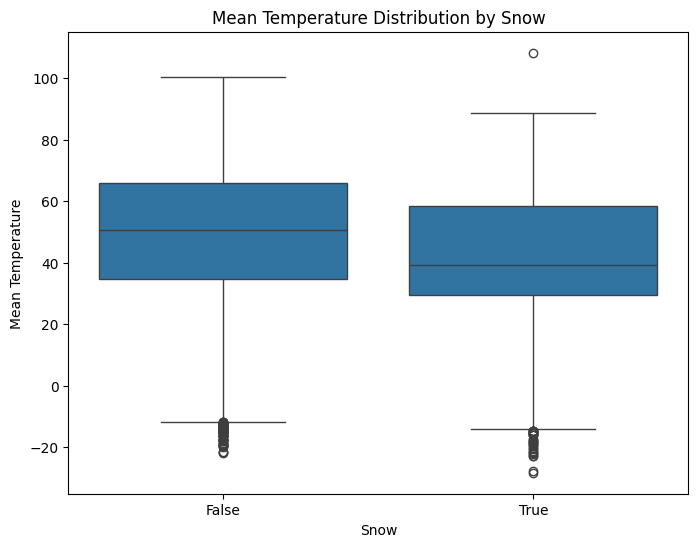

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# df['mean_temp'].hist(bins=50)
# plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='snow', y='mean_temp', data=df)
plt.title('Mean Temperature Distribution by Snow')
plt.xlabel('Snow')
plt.ylabel('Mean Temperature')
plt.show()


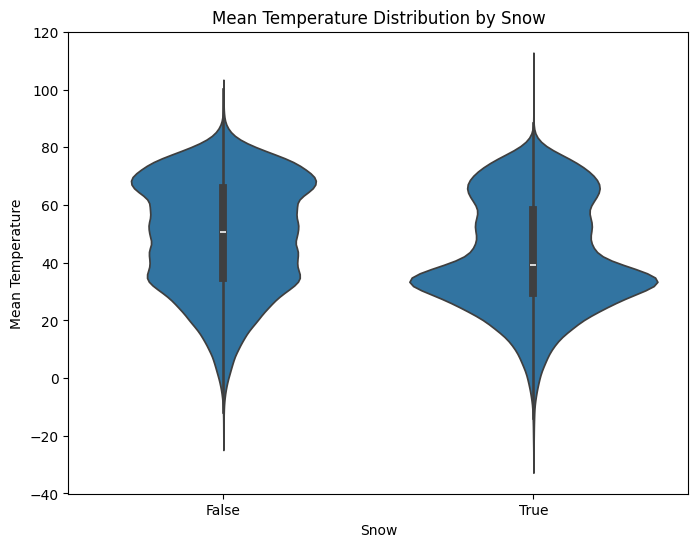

In [48]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='snow', y='mean_temp', data=df)
plt.title('Mean Temperature Distribution by Snow')
plt.xlabel('Snow')
plt.ylabel('Mean Temperature')
plt.show()


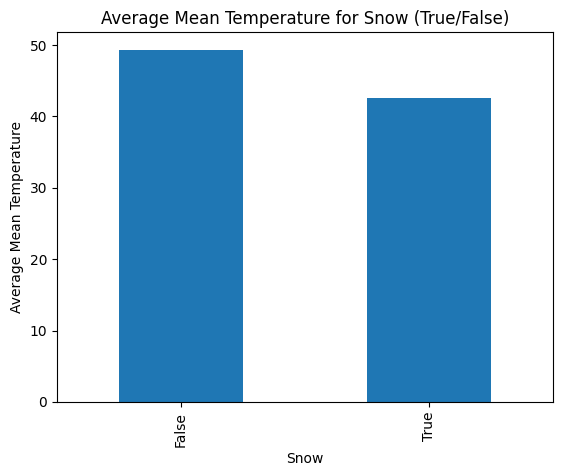

In [49]:
mean_temps = df.groupby('snow')['mean_temp'].mean()
mean_temps.plot(kind='bar')
plt.title('Average Mean Temperature for Snow (True/False)')
plt.xlabel('Snow')
plt.ylabel('Average Mean Temperature')
plt.show()

Time series analysis

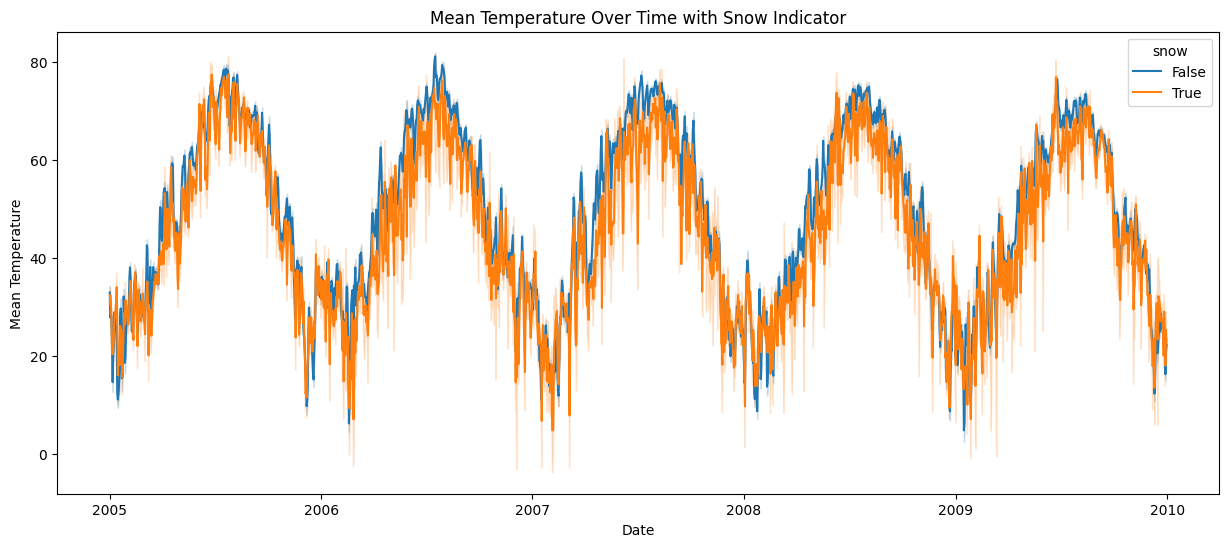

In [53]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='mean_temp', hue='snow', data=df)
plt.title('Mean Temperature Over Time with Snow Indicator')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()


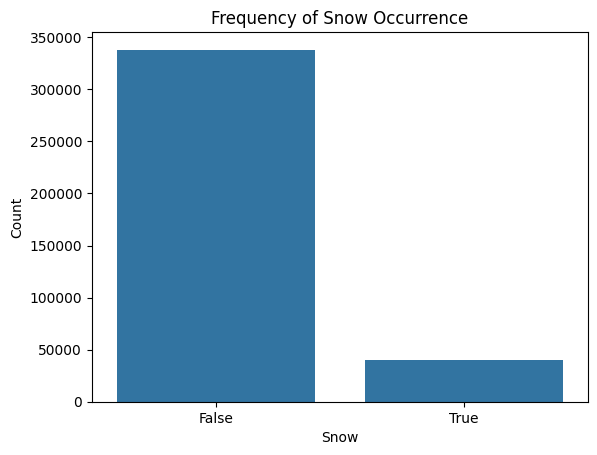

In [54]:
sns.countplot(x='snow', data=df)
plt.title('Frequency of Snow Occurrence')
plt.xlabel('Snow')
plt.ylabel('Count')
plt.show()

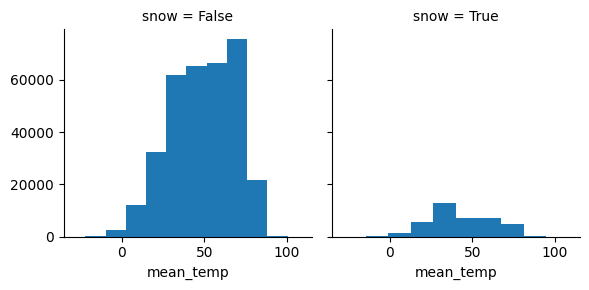

In [55]:
g = sns.FacetGrid(df, col='snow')
g.map(plt.hist, 'mean_temp')
plt.show()

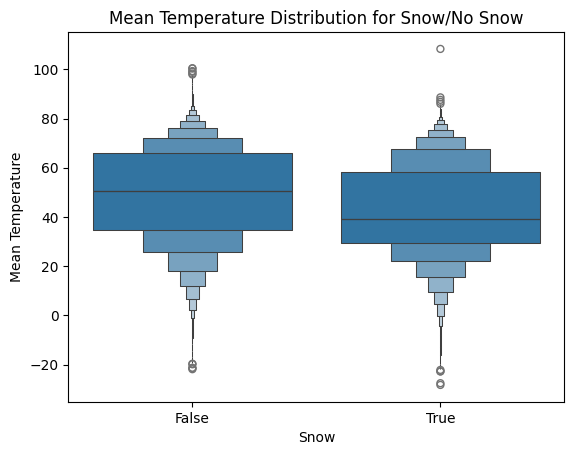

In [56]:
sns.boxenplot(x='snow', y='mean_temp', data=df)
plt.title('Mean Temperature Distribution for Snow/No Snow')
plt.xlabel('Snow')
plt.ylabel('Mean Temperature')
plt.show()

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [58]:
import datetime as dt

yesterday = dt.datetime.today() - dt.timedelta(days=1)
target_date = yesterday - dt.timedelta(days=14*365)
target_date_str = target_date.strftime('%Y-%m-%d')
print(target_date_str)

2009-11-26


In [64]:
test_df = df[df['date'] == target_date]

In [80]:
X_test = test_df.drop(['date', 'snow', 'target_snow'], axis=1)
y_test = test_df['target_snow']

In [81]:
from sklearn.model_selection import train_test_split

X = df.drop(['date', 'snow', 'target_snow'], axis=1)
y = df['target_snow']

X_train_eval, X_test, y_train_eval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [ ]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0]

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [75]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [79]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by RandomForestClassifier.